# Dimensionality Reduction

The goal of this short lab is to give you an overview on how to use the two different Dimensionality Reduction techniques to assess your data. In order to do this, two different datasets are to be explored with the different techniques.

## 1. Dimensionality Reduction on Iris Data Set

In the first part of this lab, we want to get a quick overview of the different functions that can be used for dimensionality reduction and test them on the widely known Iris dataset. Here, 3 types of flowers are featured as the target vector and data on their petal and sepal length is stored as training data. Each sample in the training set has 4 features. First, we load the dataset and import the relevant packages and functions.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
iris = datasets.load_iris()

The features can be accessed by iris.data and the targets (flower type) can be accessed by iris.target. In the next step, we want to use (truncated) SVD to narrow down the features to 2 dimensions. The truncated SVD function is part of the scikit-learn package.

In [4]:
np.random.seed(1)
p = np.random.permutation(150)
Xtrain = iris.data[p[:100]]
Xtest = iris.data[p[100:]]
ytrain = iris.target[p[:100]]
ytest = iris.target[p[100:]]
svd = TruncatedSVD(n_components=2)
svd.fit(Xtrain)
X_svd = svd.transform(Xtrain) # Transform the orginal 4-dimensional data to 2 dimensions with the SVD mapping

In order to check, if we can differentiate between the different flower groups in the 2-dimensional plane, we plot the features and highlight the flower types from the target vector in different colors.

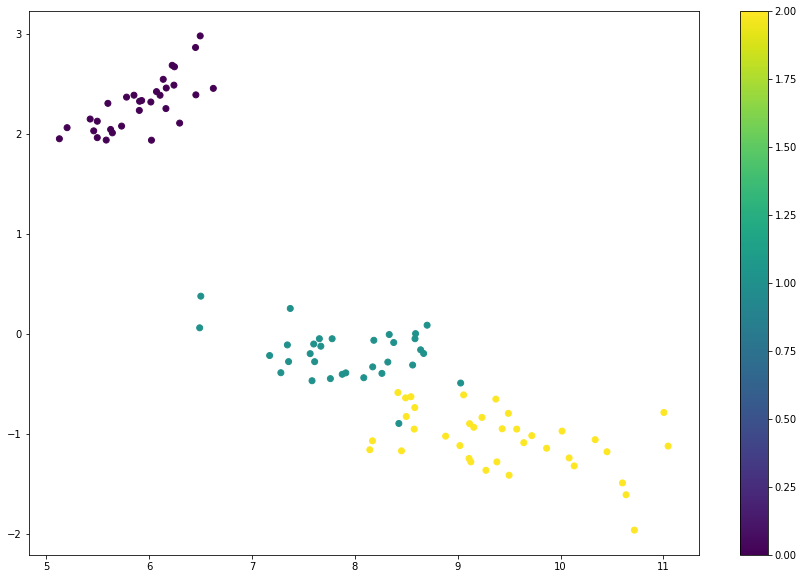

In [5]:
plt.figure(figsize=(15,10))
plt.scatter(X_svd[:,0],X_svd[:,1], c=ytrain)
plt.colorbar()

As we can see, the different flower types are quite nicely separable except for some data points from the green and yellow targets which are slightly overlapping. We also can check, to which degree the variance of the data can be explained by the 2 components. The explained variance ratio gives us a percentage of the explained variance for each component.

In [6]:
svd.explained_variance_ratio_

array([0.53279158, 0.44563153])

<u>__To Do:__</u> Use an SVM classifier to classify and evaluate the test set (Xtest, ytest) using the SVD components.

In [7]:
# To Do: Define and fit the SVM classifier
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_svd,ytrain)

SVC()

In [8]:
# To Do: Transform the test set
X_svd_test = svd.transform(Xtest)

In [9]:
# To Do: Predict the test set and generate confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = svc_model.predict(X_svd_test)
print(confusion_matrix(ytest,predictions))

[[19  0  0]
 [ 0 15  3]
 [ 0  2 11]]


Now, we also want to try the t-SNE approach by using the according function from scikit-learn.

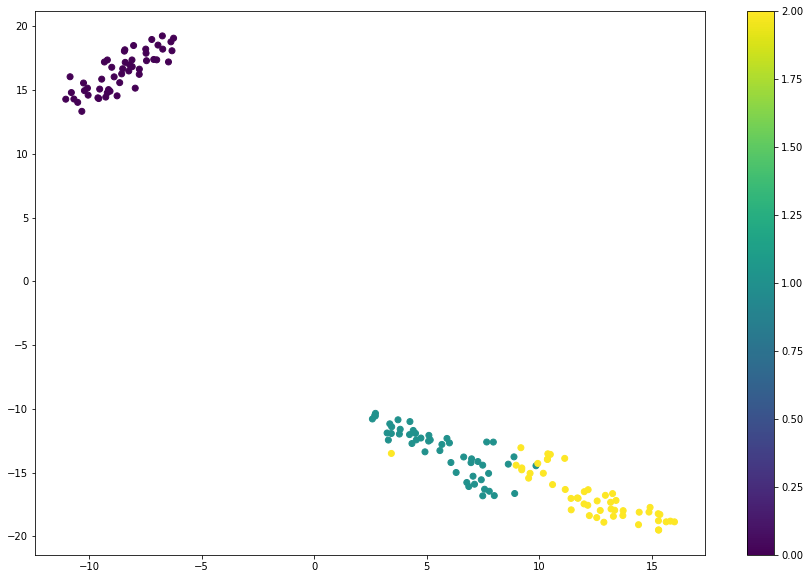

In [10]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(iris.data)
plt.figure(figsize=(15,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=iris.target)
plt.colorbar()

## 2. Dimensionality Reduction on the MNIST Dataset

Now, we want to try our Dimensionality Reduction techniques on a more complex dataset, the MNIST dataset that we already used in another lab.

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

<u>__To Do:__</u> Use Truncated SVD to reduce the data to two components and plot the transformed data.

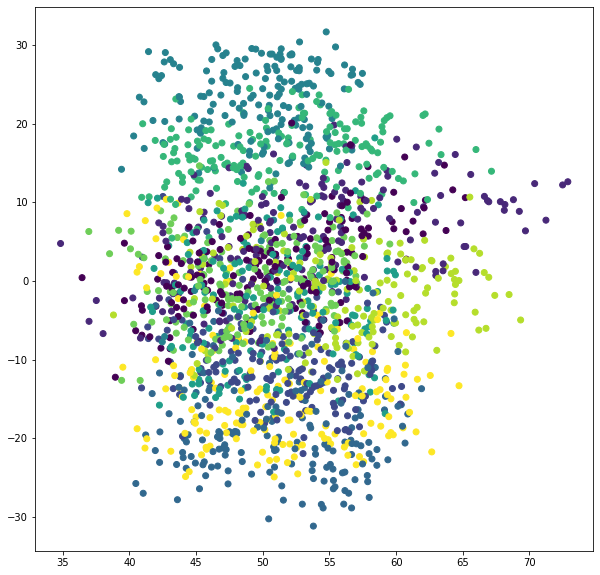

In [12]:
svd = TruncatedSVD(n_components=2)
svd.fit(digits.data)
X2 = svd.transform(digits.data)
plt.figure(figsize=(10,10))
plt.scatter(X2[:,0],X2[:,1], c=digits.target)

<u>__To Do:__</u> Check the explained variance ratio. How would you describe the separability of the different numbers via SVD?

In [13]:
svd.explained_variance_ratio_

array([0.02870851, 0.1489005 ])

The different classes were not sufficiently separated by the application of SVD on the data. This can also be seen by the low values of the explained variance ratio.

<u>__To Do:__</u> Try the same task by using t-SNE. Describe the quality of the separation between the targets. Which targets seem to be closer to each other and why?

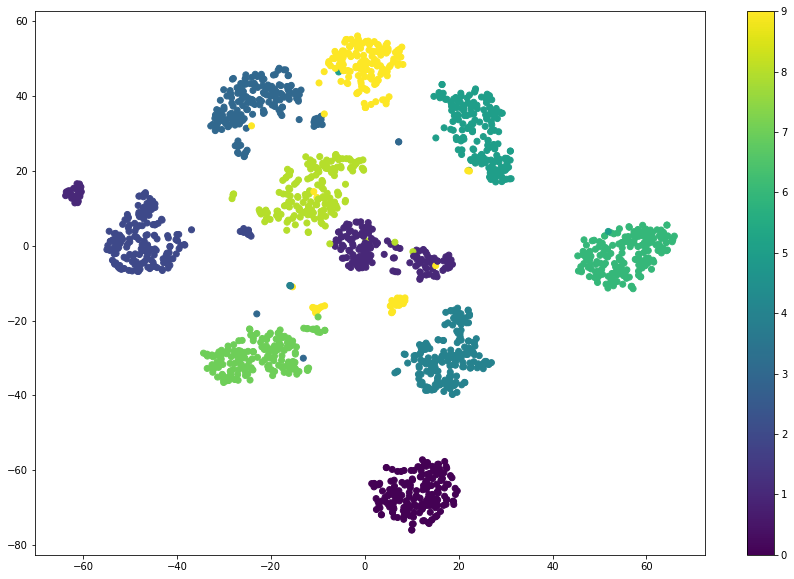

In [14]:
import numpy as np
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(15,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=digits.target)
plt.colorbar()

The t-SNE approach separates the different classes quite well.